# Voice Recognition

Here we are going to classify different people voices using Opencv, CNN, Keras. 
Ist step is to change mp3 voices in .wav format to use in programming.

In [1]:
import IPython.display as ipd
ipd.Audio('/home/abhishek/Downloads/abh.wav')

In [2]:
import librosa
data, sampling_rate = librosa.load('/home/abhishek/Downloads/abh.wav')

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa.display
import glob 

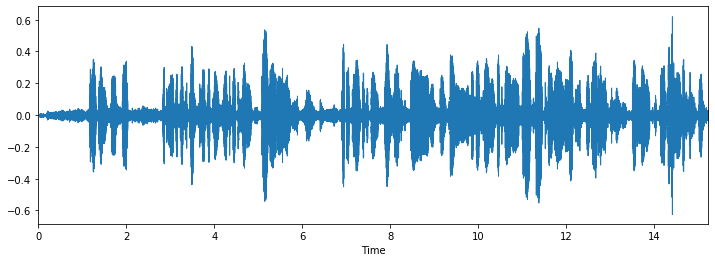

In [4]:
import IPython.display as ipd
ipd.Audio('/home/abhishek/Downloads/abhi.wav')
data, sampling_rate = librosa.load('/home/abhishek/Downloads/abhi.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [5]:
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

WE need to create spectrogram images of voices to use them on CNN model.

/home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


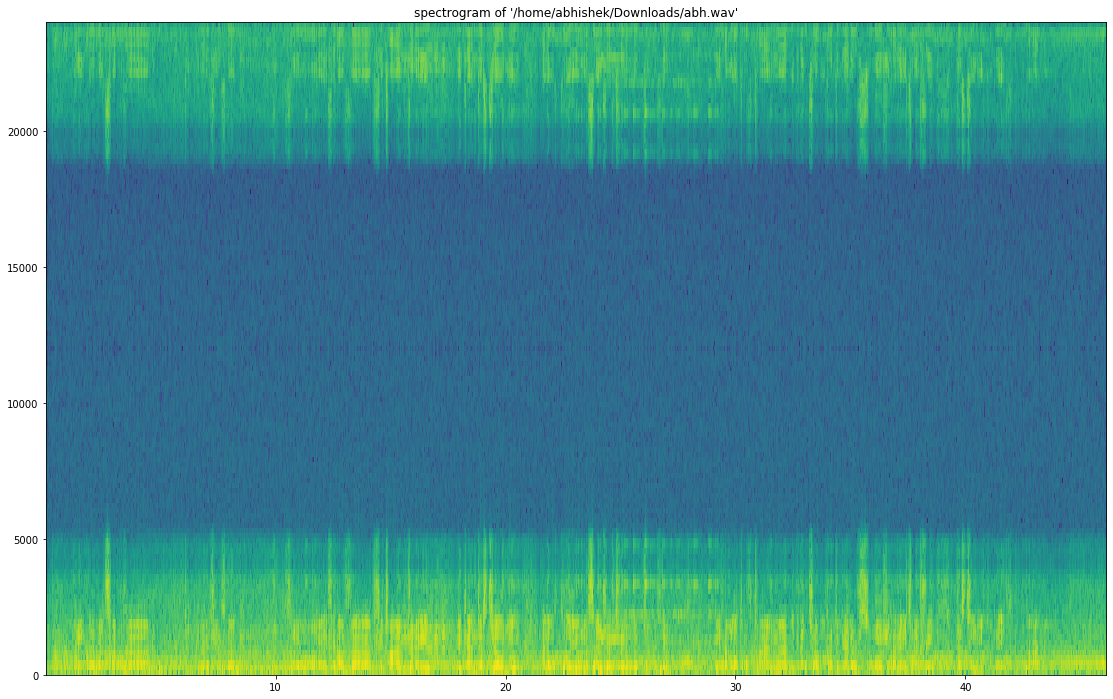

In [6]:
graph_spectrogram('/home/abhishek/Downloads/abh.wav')

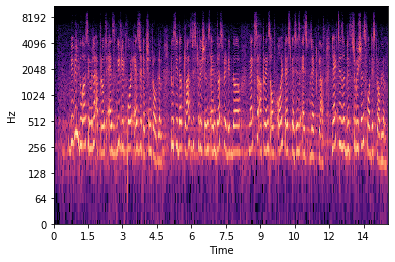

In [7]:
import numpy as np
audio_name = '/home/abhishek/Downloads/train/aa1.wav'
hop_length = 512
window_size = 1024

y, sr = librosa.load(audio_name)
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length, 
       window=window)
out = 2 * np.abs(out) / np.sum(window)

import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max),
               y_axis='log', x_axis='time')

This type of spectrogram images will be created for every voice that we want to use in recognition model.
Either we need to separate voices of different people in different folders having the same directory or in case of same folder we need to create a .csv/.xlsx file to work on all images.

Applying CNN for voice recognition

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import cv2
img=cv2.imread('/home/abhishek/Downloads/gd_voice_spectro/abhi/a5.png')
#print(np.ndarray(img))
#print(img.shape)
#classifier = Sequential

#Initalize CNN
classifier=Sequential()

#Add 1 convolution layers
classifier.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))

'''
or classifier.add(Cov2D(filters=16,kernal_size=(3,3),input_shape=(64,64,3),activation='relu'))
'''
#Add pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Add 1 more convolution layer,here we don't need input
classifier.add(Conv2D(64,(5,5),activation='relu'))

#Add max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Add global average pooling layer
classifier.add(Flatten())

#Add full connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=4,activation='sigmoid'))
#the last layer have 4 units because we have 4 people voice i.e. here 4 output layers

W0729 19:10:26.519427 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 19:10:26.709723 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 19:10:26.776817 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 19:10:26.880721 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.

In [10]:
#Compile the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fit CNN  to images

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_set=train_datagen.flow_from_directory('/home/abhishek/Downloads/gd_voice_spectro',target_size=(64,64),batch_size=32,class_mode='categorical')

test_set=test_datagen.flow_from_directory('/home/abhishek/Downloads/gd_voice_spectro_test',target_size=(64,64),batch_size=32,class_mode='categorical')

W0729 19:10:34.086549 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 19:10:34.126649 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0729 19:10:34.135012 139652782126912 deprecation.py:323] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 120 images belonging to 4 classes.
Found 63 images belonging to 4 classes.


In [11]:
classifier.fit_generator(train_set,
                         steps_per_epoch=45,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=15)

classifier.save('speaker2.h5')


W0729 19:10:59.478665 139652782126912 deprecation_wrapper.py:119] From /home/abhishek/anaconda3/envs/opencv-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
45/45 [==============================] - 20s 438ms/step - loss: 0.4759 - acc: 0.7882 - val_loss: 0.2821 - val_acc: 0.8615
Epoch 2/10
45/45 [==============================] - 15s 333ms/step - loss: 0.1669 - acc: 0.9335 - val_loss: 0.0764 - val_acc: 0.9629
Epoch 3/10
45/45 [==============================] - 15s 324ms/step - loss: 0.0775 - acc: 0.9710 - val_loss: 0.0241 - val_acc: 0.9926
Epoch 4/10
45/45 [==============================] - 15s 328ms/step - loss: 0.1075 - acc: 0.9549 - val_loss: 0.0169 - val_acc: 1.0000
Epoch 5/10
45/45 [==============================] - 15s 329ms/step - loss: 0.0180 - acc: 0.9972 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 6/10
45/45 [==============================] - 15s 328ms/step - loss: 0.0137 - acc: 0.9981 - val_loss: 0.0208 - val_acc: 0.9889
Epoch 7/10
45/45 [==============================] - 15s 323ms/step - loss: 0.0061 - acc: 0.9994 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 8/10
45/45 [==============================] - 15s 342ms/step - 

In [12]:
from keras.preprocessing import image
test_image=image.load_img('/home/abhishek/Downloads/gd_voice_spectro_test/abhi/a14.png',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
train_set.class_indices

{'Aanchal': 0, 'Harshit': 1, 'Pratham': 2, 'abhi': 3}

In [14]:
if result[0][0]==1:
    prediction='Aanchal'
elif result[0][1]==1:
    prediction='Harshit'
elif result[0][2]==1:
    prediction='Pratham'
elif result[0][3]==1:
    prediction='Abhishek'
else:
    print("Not identified")
prediction
#print(result[0][0])

'Abhishek'